# Pernyataan Masalah
Perusahaan SaaS merupakan sebuah perusahaan yang bergerak dalam bidang pembuatan software penjualan dan pemasaran ke perusahaan lain (B2B). Mereka mempekerjakan seorang data saintist untuk menganalisa kumpulan data transaksi. Data saintist tersebut di tantang untuk menyediakan beberapa analisa yang nantinya digunakan sebagai strategi-strategi dengan tujuan meningkatkan kinerja perusahaan di masa mendatang.

# Mengimport beberapa fungsi
Langkah awal yang harus dilakukan adalah "mengimport" beberapa fungsi yang nantinya berguna untuk analisa database.

In [113]:
#Import function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from geopy.geocoders import Nominatim
import matplotlib.dates as mdates
# import plotly.express as px
# from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

In [114]:
!pip install geopy

In [115]:
!pip install folium

# Mengakses database dengan format .csv
Database akan diaksed dan akan ditampilkan 5 data teratas

In [124]:
#Read database
df = pd.read_csv("SaaS_Sales.csv")

# Informasi umum mengenai database
Untuk mengetahui informasi apa saja yang ada dalam database, maka terlebih dahulu dilakukan display informasi database

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

# Informasi Database diatas
database ini mengandung 19 kolom dengan detail sebagai berikut:
1. Row ID: A unique identifier for each transaction.
2. Order ID: A unique identifier for each order.
3. Order Date: The date when the order was placed.
4. Date Key: A numerical representation of the order date (YYYYMMDD).
5. Contact Name: The name of the person who placed the order.
6. Country: The country where the order was placed.
7. City: The city where the order was placed.
8. Region: The region where the order was placed.
9. Subregion: The subregion where the order was placed.
10. Customer: The name of the company that placed the order.
11. Customer ID: A unique identifier for each customer.
12. Industry: The industry the customer belongs to.
13. Segment: The customer segment (SMB, Strategic, Enterprise, etc.).
14. Product: The product was ordered.
15. License: The license key for the product.
16. Sales: The total sales amount for the transaction.
17. Quantity: The total number of items in the transaction.
18. Discount: The discount applied to the transaction.
19. Profit: The profit from the transaction.

# Analisa Anomali
Setelah mengetahui infromasi mengenai data diatas, maka dilakukan beberapa analisa anomali:
1. Analisa "Missing Value"
2. Analisa "Inconsistancy"
3. Analisa "Outliers"
4. Analisa "duplicates"

In [126]:
#Analisa "Missing Value"
df.isnull().sum()

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

In [128]:
#Analisa "Consistancy": Pada data di atas, terdapat inconsistancy pada tipe data yaitu "order date" 
#memiliki tipe data "object". Seharusnya tipe datanya adalah "datetime64"
df[['Order Date']] = df[['Order Date']].astype('datetime64[ns]')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9994 non-null   int64         
 1   Order ID      9994 non-null   object        
 2   Order Date    9994 non-null   datetime64[ns]
 3   Date Key      9994 non-null   int64         
 4   Contact Name  9994 non-null   object        
 5   Country       9994 non-null   object        
 6   City          9994 non-null   object        
 7   Region        9994 non-null   object        
 8   Subregion     9994 non-null   object        
 9   Customer      9994 non-null   object        
 10  Customer ID   9994 non-null   int64         
 11  Industry      9994 non-null   object        
 12  Segment       9994 non-null   object        
 13  Product       9994 non-null   object        
 14  License       9994 non-null   object        
 15  Sales         9994 non-null   float64 

In [129]:
# Analisa "duplicates data"
df.duplicated().sum()

0

In [130]:
# Q1 = df.describe()['Profit']['25%']
# Q3 = df.describe()['Profit']['75%']
# IQR = Q3 - Q1
# lowerProfit = Q1 - (1.5*IQR)
# upperProfit = Q3 + (1.5*IQR)

# outlier_index = df[(df['Profit']<lowerProfit)|(df['Profit']>upperProfit)]
# outlier_index

In [131]:
# plt.figure(figsize=(15,10))
# sns.distplot(df['Profit'])
# plt.show()

# Menghapus data yang tidak diperlukan

In [132]:
df.head(0)

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit


In [133]:
df.drop('Row ID',axis = 1,inplace = True)
df.drop('Date Key',axis = 1,inplace = True)
df.drop('Contact Name',axis = 1,inplace = True)
df.head(0)

,Order ID,Order Date,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit


# Analisa Segmen Pelanggan
Analisa pertama yang akan dilakukan adalah analisa segmen pelanggan. Analisa yang akan dilakukan adalah analisis kinerja dan karakteristik penjualan di berbagai segmen pelanggan

In [76]:
# Mengelompokkan penjualan, profit, diskon berdasarkan segment pelanggan
dfSegment = df.groupby('Segment')[['Sales','Quantity','Profit']].sum()
dfSegment.sort_values('Sales',ascending = False)

,Sales,Quantity,Profit
Segment,,,
SMB,1.161401e+06,19521,134119.2092
Strategic,7.061464e+05,11608,91979.1340
Enterprise,4.296531e+05,6744,60298.6785


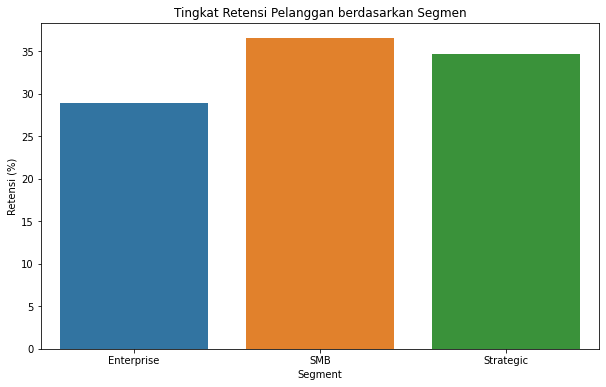

In [77]:
# Kita akan mengamati hubungan antara segmen dan ID pelanggan
customerID = df.groupby('Segment')['Customer ID'].nunique()
totalCustomers = customerID.sum()
retentionRates = (customerID / totalCustomers) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=retentionRates.index, y=retentionRates.values)
plt.title('Tingkat Retensi Pelanggan berdasarkan Segmen')
plt.xlabel('Segment')
plt.ylabel('Retensi (%)')
plt.show()


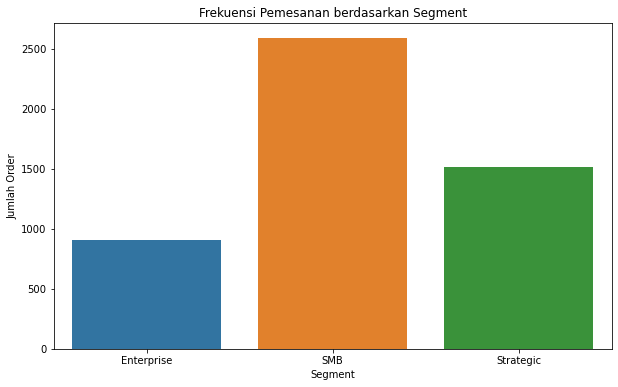

In [78]:
orderID = df.groupby('Segment')['Order ID'].nunique()

plt.figure(figsize=(10, 6))
sns.barplot(x=orderID.index, y=orderID.values)
plt.title('Frekuensi Pemesanan berdasarkan Segment')
plt.xlabel('Segment')
plt.ylabel('Jumlah Order')
plt.show()


In [79]:
dfSegment = df.groupby(['Segment', 'Product'])['Quantity'].sum().reset_index()
# dfSegment
dfSegment = dfSegment.sort_values('Quantity',ascending = False).reset_index()
dfSegment
# dfSegment = (df.query("Segment == 'SMB'")[['Product','Quantity']]).groupby('Quantity').sum()
# dfSegment = dfSegment.sort_values('Quantity',ascending = False).head(3).reset_index()
# dfSegment

,index,Segment,Product,Quantity
0,17,SMB,ContactMatcher,3617
1,27,SMB,Support,2961
2,31,Strategic,ContactMatcher,2267
3,19,SMB,FinanceHub,1949
4,23,SMB,SaaS Connector Pack,1834
5,41,Strategic,Support,1757
6,25,SMB,Site Analytics,1685
7,16,SMB,ChatBot Plugin,1625
8,21,SMB,Marketing Suite - Gold,1619
9,18,SMB,Data Smasher,1578


# Analisa Margin Profit Produk
Analisa berikutnya adalah menentukan produk-produk dengan profit margin tinggi dan rendah: 
1. Mengelompokkan produk serta menampilkan data profit dan penjualannya. 
2. Mencari persentase profit marginnya dan mengurutkannya dari yang terkecil sampai yang terbesar 
3. Mencari produk dengan presentase profit margin tertinggi dan terendah4. 

In [80]:
# Mengelompokkan produk serta menampilkan data profit dan penjualannya.
dfProfitMargin = df.groupby('Product')[['Profit','Sales']].sum()
dfProfitMargin.sort_values('Profit',ascending = False)

,Profit,Sales
Product,,
Alchemy,55617.8249,149528.0300
Site Analytics,44515.7306,330007.0540
Data Smasher,41936.6357,167380.3180
Support,32864.4698,125152.7440
FinanceHub,32136.4203,340935.4150
Marketing Suite - Gold,21278.8264,223843.6080
OneView,18138.0054,107532.1610
SaaS Connector Pack,13059.1436,91705.1640
ContactMatcher,12496.2822,410378.2650


Dari data di atas, dapat dilihat bahwa produk "Alchemy" memiliki profit terbesar, diikuti oleh produk "Site Analytics",
'data smasher' dan lainnya. Namun apakan margin profitnya juga terbesar?

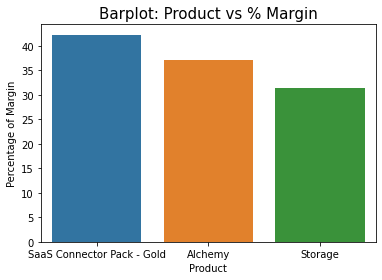

In [81]:
# Mencari persentase profit marginnya dan mengurutkannya dari yang terkecil sampai yang terbesar 
dfProfitMargin ['Percentage of Margin'] = ((dfProfitMargin['Profit']/dfProfitMargin['Sales'])*100).round(2)
dfProfitMargin = dfProfitMargin.sort_values('Percentage of Margin',ascending = False).head(3).reset_index()

sns.barplot(data = dfProfitMargin, x = 'Product', y = 'Percentage of Margin', estimator = np.median)
plt.title('Barplot: Product vs % Margin', size = 15)
plt.show()

Dari histogram diatas, dapat dilihat bahwa produk 'SaaS Connector Pack-Gold' memiliki persentase Margin Keuntungan yang terbesar. Diikuti Alchemy dan storage. Walaupun ketika di urutkan berdasarkan jumlah profit, produk "Saas Connector Pack - Gold" memiliki profit yang tidak terlalu besar, namun penjualannya yang kecil mengIsyaratkan margin profit yang besar.
Analisa berikutnya adalah apakah produk-produk tersebut mengalami kenaikan percentage margin profit dari tahun ke tahun?

In [82]:
df ['Percentage of Margin'] = ((df['Profit']/df['Sales'])*100).round(2)
df['Order Year'] = df['Order Date'].dt.year
marginProfitProductByYear = df.groupby(['Product','Order Year'])['Percentage of Margin'].sum().reset_index()

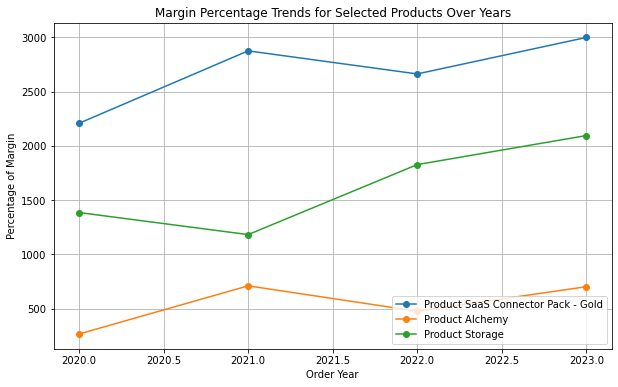

In [83]:
productsToPlot = ['SaaS Connector Pack - Gold', 'Alchemy','Storage']
filteredData = marginProfitProductByYear[marginProfitProductByYear['Product'].isin(productsToPlot)]
plt.figure(figsize=(10, 6))
for product in productsToPlot:
    productData = filteredData[filteredData['Product'] == product]
    plt.plot(productData['Order Year'], productData['Percentage of Margin'], label=f'Product {product}', marker='o')

plt.xlabel('Order Year')
plt.ylabel('Percentage of Margin')
plt.title('Margin Percentage Trends for Selected Products Over Years')
plt.legend(loc = 'lower right')
plt.grid(True)
plt.show()

Pada grafik di atas, tiga produk dengan persentase margin teratas memiliki tren kenaikan margin profit. Tiga produk tersebut harus menjadi perhatian lebih untuk meninggkatkan persentase margin perusahaan 

Kemudian dilakukan analisa dinegara mana saja penjualan produk 'SaaS Connector Pack-Gold' memiliki margin profit yang besar?

In [84]:
dfSaasConhigh = (df.query("Product == 'SaaS Connector Pack - Gold'")[['Country','Profit','Sales']]).groupby('Country').sum()
dfSaasConhigh['Percentage of Margin'] = ((dfSaasConhigh['Profit']/dfSaasConhigh['Sales'])*100).round(2)
dfSaasConhigh = dfSaasConhigh.sort_values('Percentage of Margin',ascending = False).head(3).reset_index()
dfSaasConhigh

,Country,Profit,Sales,Percentage of Margin
0,Portugal,52.6248,105.84,49.72
1,Czech Republic,30.8092,62.30,49.45
2,Luxembourg,14.9744,30.56,49.00


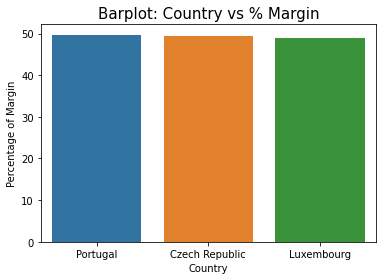

In [85]:
sns.barplot(data = dfSaasConhigh, x = 'Country', y = 'Percentage of Margin', estimator = np.median)
plt.title('Barplot: Country vs % Margin', size = 15)
plt.show()

Kemudian dilakukan analisa dinegara mana saja penjualan produk 'SaaS Connector Pack-Gold' memiliki margin profit rendah?

In [86]:
dfSaasConlow = (df.query("Product == 'SaaS Connector Pack - Gold'")[['Country','Profit','Sales']]).groupby('Country').sum()
dfSaasConlow['Percentage of Margin'] = ((dfSaasConlow['Profit']/dfSaasConlow['Sales'])*100).round(2)
dfSaasConlow = dfSaasConlow.sort_values('Percentage of Margin',ascending = False).tail(3).reset_index()
dfSaasConlow

,Country,Profit,Sales,Percentage of Margin
0,France,417.1003,1234.064,33.80
1,Japan,848.1760,2530.648,33.52
2,Sweden,139.7061,431.144,32.40


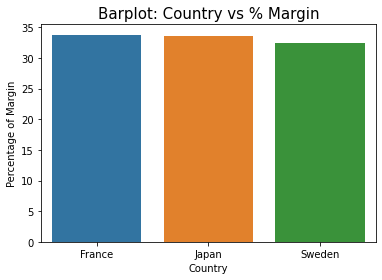

In [87]:
sns.barplot(data = dfSaasConlow, x = 'Country', y = 'Percentage of Margin', estimator = np.median)
plt.title('Barplot: Country vs % Margin', size = 15)
plt.show()

In [88]:
# Full Table join
concateSaasCon = pd.concat([dfSaasConhigh,dfSaasConlow])
concateSaasCon

,Country,Profit,Sales,Percentage of Margin
0,Portugal,52.6248,105.840,49.72
1,Czech Republic,30.8092,62.300,49.45
2,Luxembourg,14.9744,30.560,49.00
0,France,417.1003,1234.064,33.80
1,Japan,848.1760,2530.648,33.52
2,Sweden,139.7061,431.144,32.40


In [89]:
# Penentuan longitude dan latitude 6 negara di atas
def geocodeCountry(countryName):
    geolocator = Nominatim(user_agent="my_geocoder")
    location = geolocator.geocode(countryName)
    if location:
        return location.latitude, location.longitude
    else:
        return None, None
    
# Folium map
map = folium.Map(location=[20, 0], zoom_start=2)
for index, row in concateSaasCon.iterrows():
    countryName = row['Country']
    margin = row['Percentage of Margin']
    latitude, longitude = geocodeCountry(countryName)
    
    if latitude is not None and longitude is not None:
        popupText = f"{countryName}: {margin}%"
        folium.Marker(location=[latitude, longitude], popup=popupText).add_to(map)

# Menampilkan Map
map


Sementara untuk produk "marketing suit", terdapat profit yang negative. Atau bisa dikatakan mengalami kerugian. Kemudian,
kita analisa di negara mana memiliki percentage of margin negative!

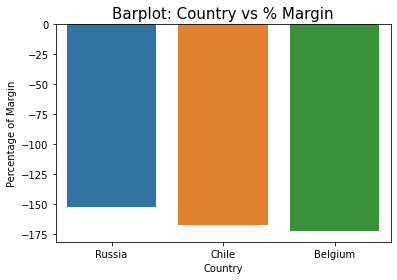

In [91]:
dfMarketingSuit = (df.query("Product == 'Marketing Suite'")[['Country','Profit','Sales']]).groupby('Country').sum()
dfMarketingSuit['Percentage of Margin'] = ((dfMarketingSuit['Profit']/dfMarketingSuit['Sales'])*100).round(2)
dfMarketingSuit = dfMarketingSuit.sort_values('Percentage of Margin',ascending = False).tail(3).reset_index()

sns.barplot(data = dfMarketingSuit, x = 'Country', y = 'Percentage of Margin', estimator = np.median)
plt.title('Barplot: Country vs % Margin', size = 15)
plt.show()

Dari data di atas, kita bisa lihat bahwa terdapat 3 negara dengan margin profit negative yang artinya mengalami kerugian. Tiga negara terbawah adalah Belgia, Chile dan Russia. Negara - Negara Tersebut harus memiliki analisa starategi penjualan lebih lanjut

# Analisa Industri
Analisa ini dilakukan untuk:
1. Menentukan industri mana yang mencetak profit tertinggi. Kemudian, dari industri tersebut, ditentukan produk mana saja yang mencetak profit tertinggi. Selanjutnya, kita akan menganalisa konsistensi produk dari industri dengan profit tertinggi dari tahun ke tahun
2. Analisa perilaku pelanggan berdasarkan industri
3. Analisa retensi pelanggan berdasarkan industri

In [92]:
totalSales = (df.groupby('Industry')['Profit'].sum().reset_index()).sort_values('Profit',ascending = False)
totalSales

,Industry,Profit
3,Finance,50348.9696
2,Energy,45282.3137
5,Manufacturing,38413.1064
1,Consumer Products,37018.0077
4,Healthcare,31969.0932
7,Retail,30207.8208
8,Tech,24615.0436
0,Communications,13976.3410
9,Transportation,7402.6967
6,Misc,7163.6290


In [93]:
dfFinance = (df.query("Industry == 'Finance'")[['Profit','Product']]).groupby('Product').sum()
dfFinance = dfFinance.sort_values('Profit',ascending = False).reset_index()
dfFinance

,Product,Profit
0,Alchemy,10181.8673
1,Site Analytics,8549.7565
2,FinanceHub,7801.7706
3,Support,7702.7251
4,Data Smasher,7535.7010
5,Marketing Suite - Gold,5810.1607
6,OneView,4805.3794
7,SaaS Connector Pack,3285.5393
8,ChatBot Plugin,1976.1304
9,SaaS Connector Pack - Gold,1926.3983


In [94]:
df['Order Year'] = df['Order Date'].dt.year
profitProductByYear = df.groupby(['Product', 'Order Year'])['Profit'].sum().reset_index()

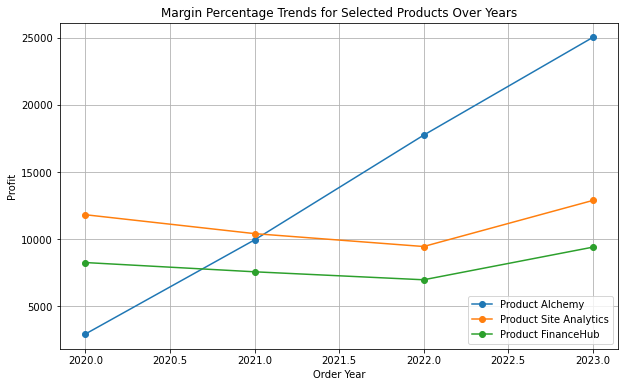

In [95]:
productsToPlot = ['Alchemy','Site Analytics','FinanceHub']
filteredData = profitProductByYear[profitProductByYear['Product'].isin(productsToPlot)]
plt.figure(figsize=(10, 6))
for product in productsToPlot:
    productData = filteredData[filteredData['Product'] == product]
    plt.plot(productData['Order Year'], productData['Profit'], label=f'Product {product}', marker='o')

plt.xlabel('Order Year')
plt.ylabel('Profit')
plt.title('Margin Percentage Trends for Selected Products Over Years')
plt.legend(loc = 'lower right')
plt.grid(True)
plt.show()

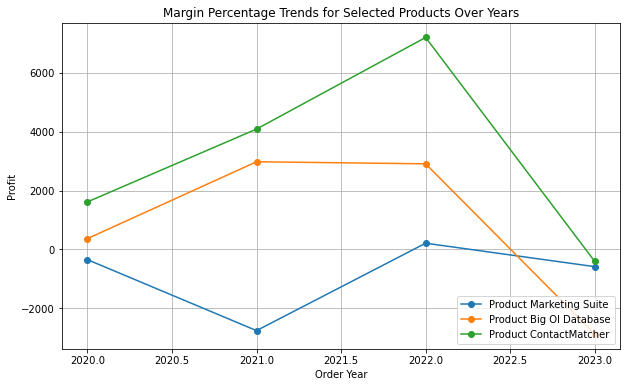

In [96]:
productsToPlot = ['Marketing Suite','Big Ol Database','ContactMatcher']
filteredData = profitProductByYear[profitProductByYear['Product'].isin(productsToPlot)]
plt.figure(figsize=(10, 6))
for product in productsToPlot:
    productData = filteredData[filteredData['Product'] == product]
    plt.plot(productData['Order Year'], productData['Profit'], label=f'Product {product}', marker='o')

plt.xlabel('Order Year')
plt.ylabel('Profit')
plt.title('Margin Percentage Trends for Selected Products Over Years')
plt.legend(loc = 'lower right')
plt.grid(True)
plt.show()

In [97]:
# Mengelompokkan kuantitas pemesanan dan diskon terhadap industri
dfIndustry = df.groupby('Industry')[['Quantity','Discount']].mean()
dfIndustry.sort_values('Discount',ascending = False)

,Quantity,Discount
Industry,,
Communications,3.657673,0.164165
Consumer Products,3.790402,0.162586
Energy,3.738602,0.159947
Tech,3.896440,0.159094
Transportation,3.923077,0.157179
Manufacturing,3.752864,0.155385
Healthcare,3.834128,0.155091
Finance,3.764457,0.153644
Retail,3.799383,0.145113


Dari data di atas, tidak ada korelasi antara kuantitas yang dipesan dengan diskon yang diberikan!

Selanjutnya dilakukan evaluasi dampak diskon terhadap volume penjualan dan pendapatan secara keseluruhan!

Total penjualan dengan diskon: 19606
Total penjualan tanpa diskon: 18267
Persentase pertambahan total penjualan karena diskon: 7.33%


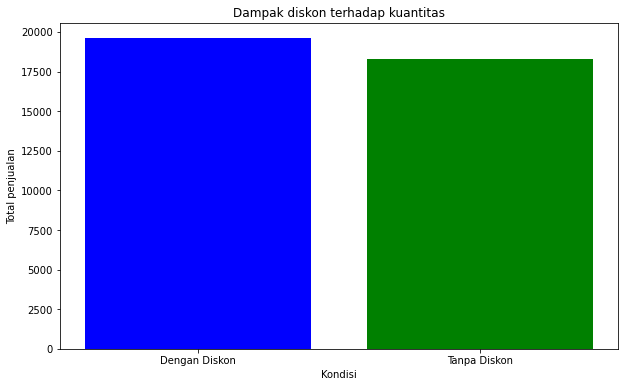

In [98]:
# Menghitung total penjualan (kuantitas) dengan dan tanpa diskon 
withDiscount = df[df['Discount'] > 0]['Quantity'].sum()
withoutDiscount = df[df['Discount'] == 0]['Quantity'].sum()

# Menghitung persentase pertambahan untuk total penjualan dengan dan tanpa diskon
percentIncrease = ((withDiscount - withoutDiscount) / withoutDiscount) * 100


print(f"Total penjualan dengan diskon: {withDiscount}")
print(f"Total penjualan tanpa diskon: {withoutDiscount}")
print(f"Persentase pertambahan total penjualan karena diskon: {percentIncrease:.2f}%")

labels = ['Dengan Diskon', 'Tanpa Diskon']
percentIncrease = [withDiscount, withoutDiscount]

plt.figure(figsize=(10, 6))
plt.bar(labels, percentIncrease, color=['blue', 'green'])
plt.xlabel('Kondisi')
plt.ylabel('Total penjualan')
plt.title('Dampak diskon terhadap kuantitas')
plt.show()

Dari data di atas, diketahui bahwa dengan adanya diskon maka total penjualan semakin besar dengan selisih sekitar 7.33%

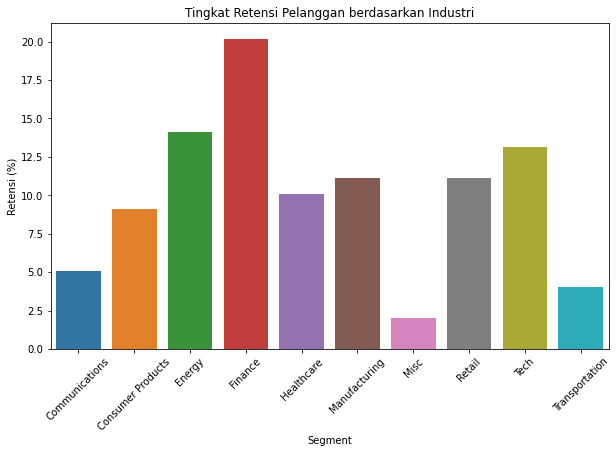

In [99]:
customerID = df.groupby('Industry')['Customer ID'].nunique()
totalCustomers = customerID.sum()
retentionRates = (customerID / totalCustomers) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=retentionRates.index, y=retentionRates.values)
plt.title('Tingkat Retensi Pelanggan berdasarkan Industri')
plt.xlabel('Segment')
plt.ylabel('Retensi (%)')
plt.xticks(rotation=45)
plt.show()

Dari data di atas, diketahui bahwa Finance adalah industri dengan laju Retensi yang terbesar, yaitu 20%. Laju retensi yang besar bermakna suatu bisnis mengalami pengurangan pelanggan yang rendah, dimana sebagian besar pelanggan kembali atau melakukan pembelian berulang dari waktu ke waktu. Hal ini mendukung tingkat profit tertinggi dimiliki oleh Finance.

# Analisa Geografis 
Analisa selanjutnya adalah menentukan negara-negara dengan total penjualan produk tertinggi

In [100]:
# Mengelompokkan jumlah penjualan berdasarkan negaranya.
# dfHighestSales = df.groupby('Country')[['Sales']].sum()
# dfHighestSales.sort_values('Sales',ascending = False).head(3)
dfHighestSales = df.groupby('Country').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum'
}).reset_index()
dfHighestSales.sort_values('Sales',ascending = False).head(3)

,Country,Sales,Profit,Quantity
47,United States,457687.6315,76381.3871,7667
46,United Kingdom,313169.8810,74989.0891,4268
24,Japan,170188.0458,-25729.3563,3724


Dari tabel di atas, terdapat tiga negara dengan penjualan tertinggi yaitu US, UK dan Japan. Kemudian dilakukan analisa penjualan produk tertinggi untuk United States.

In [101]:
# Daftar Produk dengan penjualan tinggi pada country sales
dfSales = (df.query("Country == 'United States'")[['Product','Sales']]).groupby('Product').sum()
dfSales = dfSales.sort_values('Sales',ascending = False).head(3).reset_index()
dfSales

,Product,Sales
0,ContactMatcher,73903.400
1,Site Analytics,67964.536
2,FinanceHub,65978.508


In [102]:
df['Order Year'] = df['Order Date'].dt.year
salesByYear = df.groupby(['Product', 'Order Year'])['Sales'].sum().reset_index()

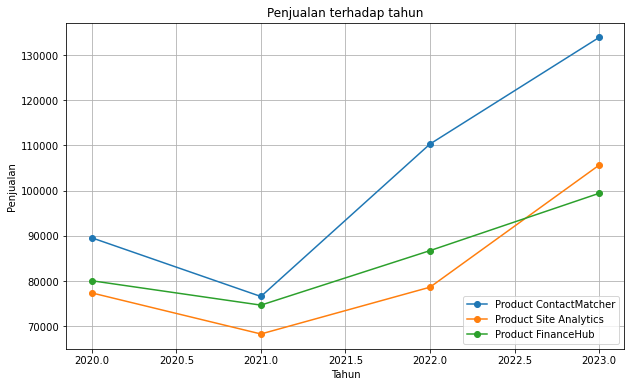

In [103]:
productsToPlot = ['ContactMatcher','Site Analytics','FinanceHub']
filteredData = salesByYear[salesByYear['Product'].isin(productsToPlot)]
plt.figure(figsize=(10, 6))
for product in productsToPlot:
    productData = filteredData[filteredData['Product'] == product]
    plt.plot(productData['Order Year'], productData['Sales'], label=f'Product {product}', marker='o')

plt.xlabel('Tahun')
plt.ylabel('Penjualan')
plt.title('Penjualan terhadap tahun')
plt.legend(loc = 'lower right')
plt.grid(True)
plt.show()

Dari grafik di atas, diketahui bahwa adanya penurunan yang tidak drasti pada ketiga produk. Namun, setelah tahun 2021, kenaikan produk "Contact Macher" mengalami kenaikan penjualan yang drastis, diikuti produk "site analitics" dan "finance hub"

# Analisa Penjualan Terhadap Waktu
Analisa terakhir yang akan dilakukan adalah analisa tren penjualan terhadap waktu.

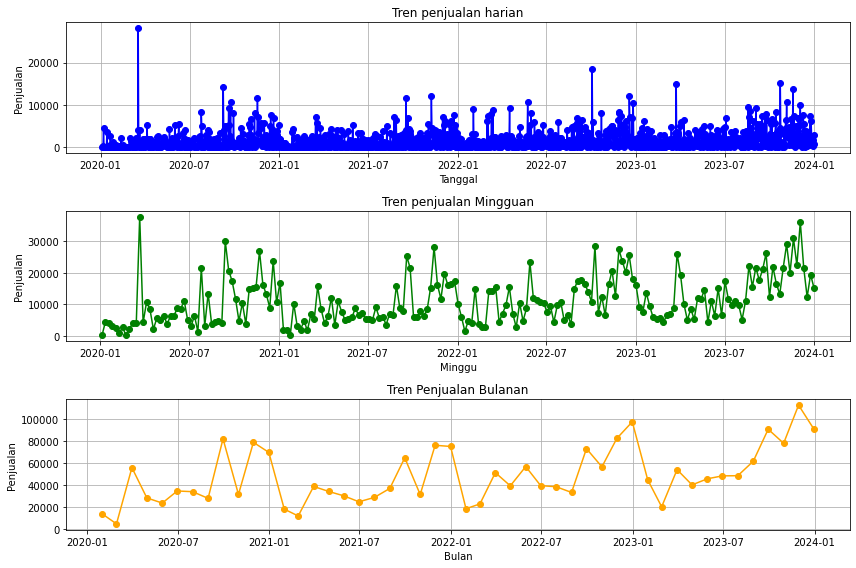

In [104]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

# 'Tanggal Pemesanan' sebagai indeks
df.set_index('Order Date', inplace=True)

# Tren penjualan harian
daily_sales = df['Sales'].resample('D').sum()

# Tren penjualan mingguan
weekly_sales = df['Sales'].resample('W').sum()

# Tren penjualan bulanan
monthly_sales = df['Sales'].resample('M').sum()

# Plot tren penjualan sepanjang waktu
plt.figure(figsize=(12, 8))

# Daily Sales Plot
plt.subplot(3, 1, 1)
plt.plot(daily_sales, marker='o', color='blue')
plt.title('Tren penjualan harian')
plt.xlabel('Tanggal')
plt.ylabel('Penjualan')
plt.grid(True)

# Weekly Sales Plot
plt.subplot(3, 1, 2)
plt.plot(weekly_sales, marker='o', color='green')
plt.title('Tren penjualan Mingguan')
plt.xlabel('Minggu')
plt.ylabel('Penjualan')
plt.grid(True)

# Monthly Sales Plot
plt.subplot(3, 1, 3)
plt.plot(monthly_sales, marker='o', color='orange')
plt.title('Tren Penjualan Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Penjualan')
plt.grid(True)

plt.tight_layout()
plt.show()
